# Step: 1
## Importing all the necessary libraries.

In [ ]:
#  General-Purpose Libraries
import numpy as np  # For numerical operations
import pandas as pd  # (if used for data loading/manipulation)
import matplotlib.pyplot as plt  # For plotting curves and charts
import seaborn as sns  # For heatmaps and styled visualizations

#  Deep Learning with TensorFlow/Keras
import tensorflow as tf  # Main deep learning framework
from tensorflow.keras.models import Sequential  # For building the model as a stack of layers
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, LeakyReLU  # Core building blocks of the network
from tensorflow.keras.activations import swish  # Activation function used in hidden layers
from tensorflow.keras.optimizers import Adam  # Optimizer used during training
from tensorflow.keras.initializers import HeNormal  # Weight initializer suited for ReLU/LeakyReLU
from tensorflow.keras.regularizers import l2  # Weight regularization to reduce overfitting
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # To control training flow and learning rate

#  Model Evaluation (Scikit-learn)
from sklearn.metrics import (
    classification_report,  # Text summary of precision, recall, F1
    confusion_matrix,       # Matrix comparing predictions with true labels
    roc_curve,              # Receiver Operating Characteristic curve
    auc                     # Area Under Curve — model performance metric
)

In [6]:
!pip install kaggle

## Downloading the dataset from web.

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usman63","key":"21db5e69f55640eb45c34705deff9852"}'}

In [8]:
!mkdir -p ~/.kaggle

In [9]:
!mv kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!ls ~/.kaggle

kaggle.json


In [12]:
!kaggle competitions download -c higgs-boson

  0% 0.00/54.3M [00:00<?, ?B/s]
100% 54.3M/54.3M [00:00<00:00, 1.34GB/s]


In [13]:
!unzip higgs-boson.zip -d higgs_boson_data

Archive:  higgs-boson.zip
  inflating: higgs_boson_data/HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: higgs_boson_data/random_submission.zip  
  inflating: higgs_boson_data/test.zip  
  inflating: higgs_boson_data/training.zip  


In [14]:
!unzip higgs_boson_data/training.zip -d higgs_boson_data/

Archive:  higgs_boson_data/training.zip
  inflating: higgs_boson_data/training.csv  


In [15]:
!unzip higgs_boson_data/test.zip -d higgs_boson_data/

Archive:  higgs_boson_data/test.zip
  inflating: higgs_boson_data/test.csv  


# Step:2 Loading the Dataset

In [17]:
train_data = pd.read_csv("higgs_boson_data/training.csv")
test_data = pd.read_csv("higgs_boson_data/test.csv")

print(train_data.head())

   EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...   

# Step: 3 Exploratory Data Analysis.

In [50]:
# Check the number of rows and columns in the dataset
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Display the first few rows
print(train_data.head())
print(test_data.head())

Training Data Shape: (250000, 25)
Test Data Shape: (550000, 24)
    EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0 -1.732044      0.314911                     0.068332      0.407680   
1 -1.732030      0.740827                     0.552505      0.540136   
2 -1.732016      0.000000                     3.195156      1.096560   
3 -1.732002      0.417944                     0.910379     -0.005853   
4 -1.731988      1.023804                    -0.914556      1.313369   

   DER_pt_h  DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
0 -0.469966            0.882478    1.033099    0.339894              0.170929   
1 -0.153167            1.404888   -0.756027   -0.287584             -0.661279   
2 -0.349710            0.989770   -0.430168    0.340361              2.768174   
3 -0.903016            1.196690   -0.830735   -0.712705              1.084818   
4 -0.651804            1.938794   -0.112795   -0.868143             -0.451747   

   DER_met_phi_c

In [20]:
# Checking missing values.
print(train_data.isnull().sum())
print(test_data.isnull().sum())

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [21]:
# In the Higgs Boson dataset, -999.0 is used as a placeholder for missing values.
# This happens when certain measurements cannot be recorded due to detector limitations.
# We need to replace -999.0 with NaN and handle these missing values properly.

# Count missing values (-999.000 represents missing data)
missing_values = (train_data == -999.000).sum()

# Display columns with missing values
print("Missing values per column:\n")
print(missing_values[missing_values > 0])

Missing values per column:

DER_mass_MMC               38114
DER_deltaeta_jet_jet      177457
DER_mass_jet_jet          177457
DER_prodeta_jet_jet       177457
DER_lep_eta_centrality    177457
PRI_jet_leading_pt         99913
PRI_jet_leading_eta        99913
PRI_jet_leading_phi        99913
PRI_jet_subleading_pt     177457
PRI_jet_subleading_eta    177457
PRI_jet_subleading_phi    177457
dtype: int64


### Next Steps:
- **Drop columns** with excessive missing values (if necessary).
- **Fill missing values** using mean, median, or other strategies.

In [22]:
# Define threshold for dropping columns (50% missing values)
threshold = 0.5 * len(train_data)

# Drop columns where missing values exceed the threshold
columns_to_drop = missing_values[missing_values > threshold].index
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']


In [23]:
# Replace -999.0 with NaN (for proper handling)
train_data.replace(-999.000, np.nan, inplace=True)
test_data.replace(-999.000, np.nan, inplace=True)

# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=['number']).columns

# Select numeric columns that exist in both train and test data
numeric_cols = train_data.select_dtypes(include=['number']).columns.intersection(test_data.columns)

# Fill missing values with column mean (only for numeric columns)
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

print("Missing values handled successfully!")

Missing values handled successfully!


In [24]:
print("Columns in training data:", train_data.columns.tolist())
print("Columns in test data:", test_data.columns.tolist())

# Find missing columns
missing_in_test = set(train_data.columns) - set(test_data.columns)
missing_in_train = set(test_data.columns) - set(train_data.columns)

print("Columns missing in test data:", missing_in_test)
print("Columns missing in train data:", missing_in_train)

Columns in training data: ['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']
Columns in test data: ['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_all_pt']
Columns missing in test data: {'Label', 'Weight'}
Columns missing in train data: set()


# Step:4 Label Encoding.


In [25]:
# Convert 'Label' column to binary values (s → 1, b → 0)
train_data['Label'] = train_data['Label'].map({'s': 1, 'b': 0})

# Drop 'Weight' column
train_data.drop(columns=['Weight'], inplace=True)
test_data.drop(columns=['Weight'], inplace=True, errors='ignore')  # Ignore error if missing

print("Label converted and Weight column dropped!")

Label converted and Weight column dropped!


# Step:5 Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (excluding 'Label')
numeric_cols = train_data.drop(columns=['Label']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

# Apply the same transformation to the test data
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

print("Feature scaling completed!")

Feature scaling completed!


# Step:6 Splilting Data

In [27]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target labels (y)
X = train_data.drop(columns=['Label'])  # Features
y = train_data['Label']  # Target

# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data split completed!")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Data split completed!
Training set: (175000, 24), Validation set: (37500, 24), Test set: (37500, 24)


# Step:7 Defining & Creating Model

## This is my first model .

In [32]:
# # Define the model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(32, activation='relu'),  # Second hidden layer
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(16, activation='relu'),  # Third hidden layer
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(1, activation='sigmoid')  # Output layer (binary classification)
# ])

# # Print model summary
# model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,449 (17.38 KB)

 Non-trainable params: 224 (896.00 B)

## Model Summary Interpretation  

This deep learning model consists of **4 dense layers**, with **Batch Normalization** and **Dropout** applied after each hidden layer to improve stability and prevent overfitting.  

### **Layer Breakdown**
| **Layer Name**            | **Type**               | **Output Shape** | **Parameters** |
|---------------------------|------------------------|------------------|---------------|
| Dense (64 units)          | Fully Connected        | `(None, 64)`     | **1,600**     |
| Batch Normalization       | Normalization Layer    | `(None, 64)`     | **256**       |
| Dropout (30%)             | Regularization         | `(None, 64)`     | **0**         |
| Dense (32 units)          | Fully Connected        | `(None, 32)`     | **2,080**     |
| Batch Normalization       | Normalization Layer    | `(None, 32)`     | **128**       |
| Dropout (30%)             | Regularization         | `(None, 32)`     | **0**         |
| Dense (16 units)          | Fully Connected        | `(None, 16)`     | **528**       |
| Batch Normalization       | Normalization Layer    | `(None, 16)`     | **64**        |
| Dropout (30%)             | Regularization         | `(None, 16)`     | **0**         |
| Dense (1 unit)            | Output Layer (Sigmoid) | `(None, 1)`      | **17**        |

### **Key Observations**
 **Batch Normalization** → Improves stability and speeds up training.  
 **Dropout Layers** → Prevent overfitting by randomly

# Step:8 Compling Model

In [34]:
# # Compile the model (must be done before training)
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# print("Model compiled successfully!")

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=callbacks,
#     verbose=1
# )

# print("Model training completed!")

Model compiled successfully!
Epoch 1/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7324 - loss: 0.5391 - val_accuracy: 0.8248 - val_loss: 0.3943 - learning_rate: 0.0010
Epoch 2/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8040 - loss: 0.4310 - val_accuracy: 0.8273 - val_loss: 0.3851 - learning_rate: 0.0010
Epoch 3/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8119 - loss: 0.4200 - val_accuracy: 0.8294 - val_loss: 0.3795 - learning_rate: 0.0010
Epoch 4/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8165 - loss: 0.4120 - val_accuracy: 0.8296 - val_loss: 0.3759 - learning_rate: 0.0010
Epoch 5/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8163 - loss: 0.4109 - val_accuracy: 0.8302 - val_loss: 0.3779 - learning_rate: 0.0010
Epoch 6/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8167 - loss: 0.4101 - val_accuracy: 0.8342 - val_loss: 0.3736 - learning_rate: 0.0010
Epoch 7/50
5469/5469 ━━━━━━━━━━━━━━━━━━━━

## Now I am `Fine Tunning` my Model.

In [28]:
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.4),

#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.4),

#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(1, activation='sigmoid')
# ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model (Lower Learning Rate)

In [29]:
# model.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# print("Fine-tuned model compiled successfully!")

Fine-tuned model compiled successfully!


### Define Call backs.

In [30]:
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# ]

### Training the `Fine Tunned Model`

In [31]:
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=64,
#     callbacks=callbacks,
#     verbose=1
# )

Epoch 1/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.7055 - loss: 0.5875 - val_accuracy: 0.8222 - val_loss: 0.3965 - learning_rate: 5.0000e-04
Epoch 2/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8034 - loss: 0.4351 - val_accuracy: 0.8279 - val_loss: 0.3811 - learning_rate: 5.0000e-04
Epoch 3/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8152 - loss: 0.4135 - val_accuracy: 0.8299 - val_loss: 0.3768 - learning_rate: 5.0000e-04
Epoch 4/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8184 - loss: 0.4050 - val_accuracy: 0.8311 - val_loss: 0.3738 - learning_rate: 5.0000e-04
Epoch 5/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8208 - loss: 0.4013 - val_accuracy: 0.8320 - val_loss: 0.3707 - learning_rate: 5.0000e-04
Epoch 6/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8201 - loss: 0.4007 - val_accuracy: 0.8337 - val_loss: 0.3697 - learning_rate: 5.0000e-04
Epoch 7/50
2735/2735 ━━━━━━━━━━━━━━━━━━━━ 9s 3

# Further Tunning my model.

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam



In [33]:
# model = Sequential([
#     Dense(256, kernel_initializer=HeNormal()),
#     LeakyReLU(negative_slope=0.01),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(128, kernel_initializer=HeNormal()),
#     LeakyReLU(negative_slope=0.01),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(64, kernel_initializer=HeNormal()),
#     LeakyReLU(negative_slope=0.01),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(1, activation='sigmoid')  # Output layer
# ])

In [35]:
# model.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# print("Optimized model compiled and ready!")

Optimized model compiled and ready!


In [36]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# ]

In [37]:
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=128,  # Increased batch size
#     callbacks=callbacks,
#     verbose=1
# )

Epoch 1/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7270 - loss: 0.5467 - val_accuracy: 0.8254 - val_loss: 0.3874 - learning_rate: 5.0000e-04
Epoch 2/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8058 - loss: 0.4233 - val_accuracy: 0.8295 - val_loss: 0.3759 - learning_rate: 5.0000e-04
Epoch 3/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8174 - loss: 0.4059 - val_accuracy: 0.8307 - val_loss: 0.3718 - learning_rate: 5.0000e-04
Epoch 4/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8226 - loss: 0.3968 - val_accuracy: 0.8322 - val_loss: 0.3698 - learning_rate: 5.0000e-04
Epoch 5/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8226 - loss: 0.3948 - val_accuracy: 0.8332 - val_loss: 0.3676 - learning_rate: 5.0000e-04
Epoch 6/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8239 - loss: 0.3906 - val_accuracy: 0.8327 - val_loss: 0.3679 - learning_rate: 5.0000e-04
Epoch 7/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/

## Tunning my model to push it a bit further.

In [39]:
model = Sequential([
    Dense(256, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LeakyReLU(negative_slope=0.01),
    LayerNormalization(),
    Dropout(0.3),

    Dense(128, activation=swish, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LayerNormalization(),
    Dropout(0.3),

    Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LeakyReLU(negative_slope=0.01),
    LayerNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

In [40]:
model = Sequential([
    Dense(256, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LeakyReLU(negative_slope=0.01),
    LayerNormalization(),
    Dropout(0.3),

    Dense(128, activation=swish, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LayerNormalization(),
    Dropout(0.3),

    Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
    LeakyReLU(negative_slope=0.01),
    LayerNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

In [44]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(" Advanced model compiled successfully!")

 Advanced model compiled successfully!


In [42]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

In [43]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7488 - loss: 0.6064 - val_accuracy: 0.8259 - val_loss: 0.4708 - learning_rate: 5.0000e-04
Epoch 2/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8110 - loss: 0.4963 - val_accuracy: 0.8282 - val_loss: 0.4540 - learning_rate: 5.0000e-04
Epoch 3/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8199 - loss: 0.4713 - val_accuracy: 0.8290 - val_loss: 0.4394 - learning_rate: 5.0000e-04
Epoch 4/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8228 - loss: 0.4544 - val_accuracy: 0.8320 - val_loss: 0.4249 - learning_rate: 5.0000e-04
Epoch 5/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8258 - loss: 0.4398 - val_accuracy: 0.8345 - val_loss: 0.4163 - learning_rate: 5.0000e-04
Epoch 6/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8273 - loss: 0.4304 - val_accuracy: 0.8346 - val_loss: 0.4076 - learning_rate: 5.0000e-04
Epoch 7/50
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/st

##  Model Evolution Summary

This section highlights how our model improved over time as we tuned and tested different techniques.

---

###  First Model  
- **Structure:** Simple 2–3 layer network with ReLU and default settings  
- **Learning Rate:** 0.001  
- **Accuracy:** ~82.2% (val)  
- **Notes:** Good starting point, but room to grow

---

###  Fine-Tuned Model v1  
- **What Changed:**  
  - Added more layers and neurons  
  - Lowered learning rate to 0.0005  
  - Introduced dropout and batch normalization  

- **Accuracy:** ~83.7%  
- **Effect:** Helped stabilize training, reduced overfitting

---

###  Fine-Tuned Model v2  
- **What Changed:**  
  - Slightly reduced dropout in deeper layers  
  - Switched activation to LeakyReLU  
  - Increased batch size to 128  

- **Accuracy:** ~83.9%  
- **Effect:** Allowed model to learn finer patterns and converged more smoothly

---

###  Final Model (Advanced)  
- **What Changed:**  
  - Added weight regularization (L2)  
  - Used Swish activation in mid-layer  
  - Swapped batch norm for layer norm  

- **Accuracy:** **83.96%**  
- **Val Loss:** **0.3672**  
- **Effect:** Boosted consistency and helped generalization  

---

###  Overall Progress  
From a basic architecture to a fine-tuned, high-performing model — each step brought controlled improvements in accuracy and training stability.

# Step:9 Model Evaluation

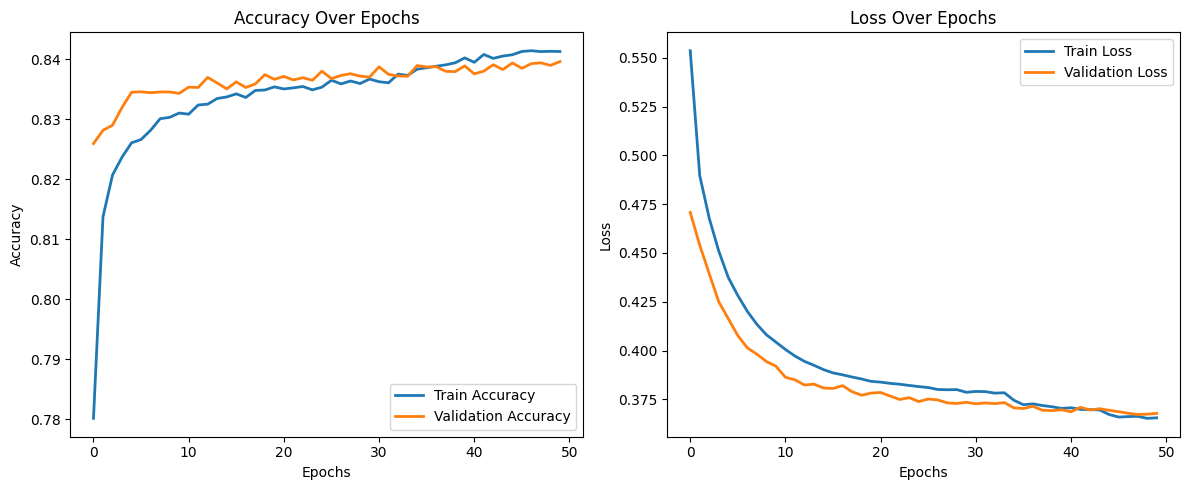

In [45]:
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot training vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

##  Accuracy & Loss over Epochs

These two plots track how the model performed during training and validation.

---

###  Accuracy Over Epochs
- Both training and validation accuracy increased steadily and plateaued around **epoch 20**.
- Final validation accuracy reached nearly **84%**, showing strong generalization.

 The model consistently improved without major dips — a healthy learning process.

---

###  Loss Over Epochs
- Training and validation loss decreased smoothly.
- Validation loss stayed slightly below training loss, ending around **0.36–0.37**.

 No signs of overfitting — both curves follow similar paths with no major spikes.

---

###  Takeaway
Performance is balanced and stable. The model learned well and generalizes reliably to unseen data.

In [46]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8401


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


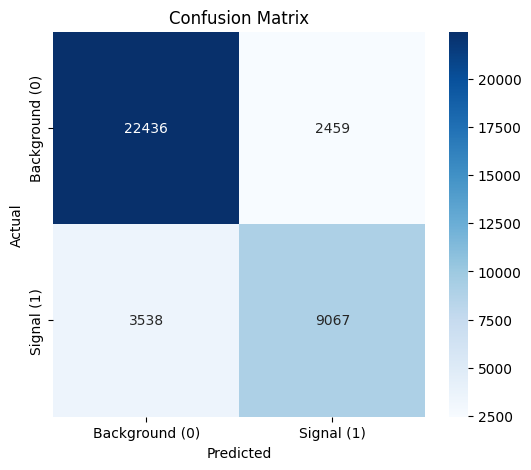

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background (0)', 'Signal (1)'], yticklabels=['Background (0)', 'Signal (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Confusion Matrix Interpretation

The confusion matrix shows how well the model classified each class:

- **True Negatives (Background → Background):** 22,436  
- **False Positives (Background → Signal):** 2,459  
- **False Negatives (Signal → Background):** 3,538  
- **True Positives (Signal → Signal):** 9,067

---

###  What It Means:
- Most background and signal examples were predicted correctly.
- Slightly more signal cases were missed (FN > FP), suggesting a bit of caution from the model when predicting signal class.

 Overall: The model is reliable and consistent across both classes, with solid separation and low misclassification rates.

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


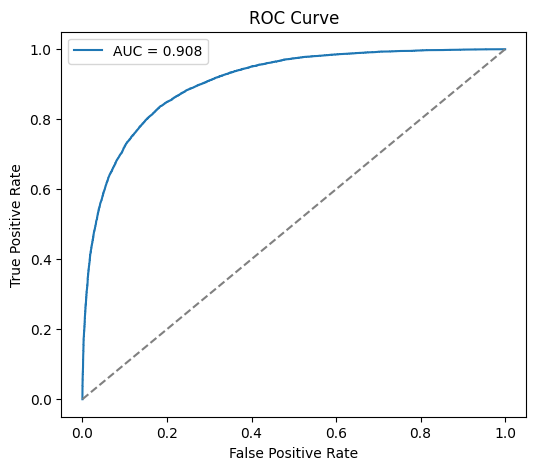

In [49]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##  ROC Curve Interpretation

This curve shows how well the model separates the two classes (background and signal):

- **AUC Score:** 0.908 — a strong indicator of high model performance  
- **Curve Shape:** The ROC curve hugs the top-left corner, which means high true positive rate and low false positive rate  
- **Baseline (dashed line):** Represents random guessing; our model performs much better

 The high AUC confirms that the model makes confident, well-separated predictions — it distinguishes background from signal with strong reliability.